In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

In [2]:
data_folder_location = 'C:/Users/E0514808/Documents/Learning/Kaggle Competitions/Solar Power Generation/Data/'

#Import Plant generation data and weather senson data
plant1_generation_data = pd.read_csv(data_folder_location + 'Plant_1_Generation_Data.csv',index_col=False)
plant2_generation_data = pd.read_csv(data_folder_location + 'Plant_2_Generation_Data.csv',index_col=False)

# Import weather sensor data
plant1_weather_sensor_data = pd.read_csv(data_folder_location + 'Plant_1_Weather_Sensor_Data.csv',index_col=False)
plant2_weather_sensor_data = pd.read_csv(data_folder_location + 'Plant_2_Weather_Sensor_Data.csv',index_col=False)

In [3]:
#Retaining relevant data
plant2_generation_Time = plant2_generation_data.groupby(['DATE_TIME'],as_index=False).sum()
plant2_generation_Time = plant2_generation_Time[['DATE_TIME','DC_POWER','AC_POWER','DAILY_YIELD']]

In [8]:
#Retaining relevant data
plant2_weather_sensor_data1 = plant2_weather_sensor_data.drop(['PLANT_ID', 'SOURCE_KEY'], axis=1)

# Merge plant 1 solar generation data and weather data
merged_data_plant2 = pd.merge(plant2_generation_Time, plant2_weather_sensor_data1, how='inner', on='DATE_TIME')

## AC Power Output prediction of Plant

In [45]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from sklearn.utils import check_array
import xgboost as xgb
from xgboost import plot_importance
plt.style.use('fivethirtyeight')

In [10]:
target = merged_data_plant2['AC_POWER']
features =merged_data_plant2[['IRRADIATION','AMBIENT_TEMPERATURE']]

In [12]:
# Split the data in to train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state = 5)

In [22]:
lm = linear_model.LinearRegression()
model_lm = lm.fit(X_train, y_train)
pred_y_test_lm = lm.predict(X_test)

In [54]:
# Calculate MSE, MAE and MAPE for Predicted output to quantify model error
R2_lm = r2_score(y_test, pred_y_test_lm)
mse_lm = mean_squared_error(y_test, pred_y_test_lm)
mae_lm = mean_absolute_error(y_test, pred_y_test_lm)
mase_lm = mean_absolute_scaled_error(y_test, pred_y_test_lm,y_train)

print('R2 using Linear Regression:', R2_lm, '  '   'MSE using Linear Regression:', mse_lm, '\n '   'MAE using Linear Regression:', mae_lm,'  '   'MASE using Linear Regression:', mase_lm )

R2 using Linear Regression: 0.8331420997408432   MSE using Linear Regression: 6165288.928054745 
 MAE using Linear Regression: 1577.5537872942903   MASE using Linear Regression: 0.24768773390073895


In [24]:
#Fit XGB model on the Solar Generation Dataset
model_xgb = xgb.XGBRegressor(n_estimators=50)
model_xgb.fit(X_train, y_train,
                             eval_set=[(X_train, y_train),
                                       (X_test, y_test)],
                             early_stopping_rounds=50,
                             verbose=False)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=50, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

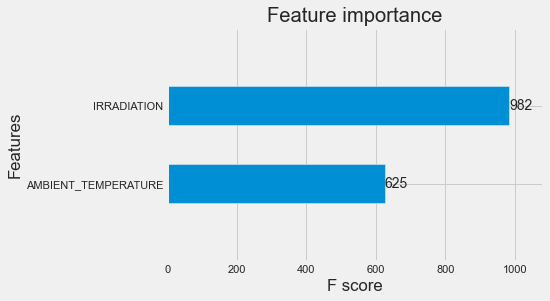

In [25]:
#Plot features by Significance for forecasting
_ = plot_importance(model_xgb, height=0.5)

In [27]:
pred_y_test_xgb = model_xgb.predict(X_test)

In [55]:
# Calculate MSE, MAE and MAPE for Predicted output to quantify model error
R2_xgb = r2_score(y_test, pred_y_test_xgb)
mse_xgb = mean_squared_error(y_test, pred_y_test_xgb)
mae_xgb = mean_absolute_error(y_test, pred_y_test_xgb)
mase_xgb = mean_absolute_scaled_error(y_test, pred_y_test_xgb,y_train)

print('R2 using XGB:', R2_xgb, '  '   'MSE using XGB:', mse_xgb, '\n '   'MAE using XGB:', mae_xgb,'  '   'MASE using XGB:', mase_xgb )

R2 using XGB: 0.9020792863295167   MSE using XGB: 3618105.53100688 
 MAE using XGB: 820.6042959590977   MASE using XGB: 0.12884100696428652
